In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression

from fractions import Fraction 
from yellowbrick.target.feature_correlation import feature_correlation

import pandas as pd
import numpy as np
import torch
import seaborn as sns


import matplotlib.pyplot as plt

C:\Users\Gelassen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
vrn = pd.read_csv('test.csv')

In [3]:
vrn = vrn.drop(["UID", "URL_2", "URL_3", "URL_4", "URL_5", "URL_6", "URL_7", "URL_8"], axis=1)
vrn.head()

data_frame = pd.DataFrame(vrn)

In [4]:
data_frame.head()

,PROPERTY_TYPE,URL_1,PRICE,ADDRESS,SQUARE_METERS,ROOMS,FLOORS,BACKYARD_SQUARE_METERS,DESCRIPTION,DISTRICT
0,Дом,https://www.vrx.ru/data/824043_36332.html,3 810 000 ₽,"Новоусманский р-н, Новая Усмань с, Цветочная (...",106/45/20 кв.м,4,2 этажа Монолит,7.45 соток,Мечтаете жить в большом доме?\r\nРазрешите пре...,NaN
1,Дом,https://www.vrx.ru/data/858989_36183.html,4 980 000 ₽,"Новоусманский р-н, Новая Усмань с, Юрия Гагари...",97.3/59/16 кв.м,4,1 этаж Кирпич,10 соток,"Аванс. ""Возвращение домой — забавная штука: зн...",NaN
2,Дом,https://www.vrx.ru/data/782808_36332.html,9 950 000 ₽,"Воронеж, Жилой массив Ветряк кв-л (Центральный...",146.2/98/20 кв.м,4,2 этажа Деревянный,5.5 соток,Идеальное место для комфортного проживания!\r\...,"(Центральный р-н, 9 км)"
3,Дом,https://www.vrx.ru/data/844541_36005.html,8 500 000 ₽,"Воронеж, Донская ул, 75а (Коминтерновский р-н,...",249/-/18 кв.м,3 этажа Кирпич,2 соток,Продается трёхэтажный дом!\r\nЦентральная кана...,Продается трёхэтажный дом!\r\nЦентральная кана...,"(Коминтерновский р-н, Солнечная-Беговая)"
4,Дом,https://www.vrx.ru/data/861773_36183.html,3 700 000 ₽,"Новоусманский р-н, Новая Усмань с, Ростовская ...",76/40/12 кв.м,3,1 этаж Блочный,12 соток,Предлагаем на продажу дом отдельно стоящий на ...,NaN


In [5]:
# targets: 
# check for NaN and errors (e.g. room field for some rows is missed and the rest columns are shift)
# [done] price -> clean from currency sign
# address -> to number, 
# [done] square meters -> tokenized -> (deprecated: sum in one number) expose in separate features
# [done] room -> clean broken data (shift in row)
# [done] floors -> split on two features -> convert in numbers (one-hot encoder)
# [done] backyard -> convert to number
# [discard] district -> convert to number
# [done] new_feature materials -> one-hot encoding

# considered options:
# DictVectorizer() -> works only with maps, still requires pre-processing 
# LabelEncoder() -> just creates categories and maps existing data to it -> already down on the stage of scrapping


In [6]:
def pre_process_price(price):
    if ("₽" or "$" or "€") not in price:
        return price
        
    tokens = price.split()
    result = ''
    for idx in range(0, len(tokens)-1): # without last value
        result += tokens[idx]
    
    return result

In [7]:
# pre-processing: PROPERTY_TYPE -> categoric to numeric transformation
label_ecoder = preprocessing.LabelEncoder()
label_ecoder.fit(["Дом", "Квартира"])
data_frame["PROPERTY_TYPE"] = label_ecoder.transform(data_frame["PROPERTY_TYPE"])
data_frame.head()

,PROPERTY_TYPE,URL_1,PRICE,ADDRESS,SQUARE_METERS,ROOMS,FLOORS,BACKYARD_SQUARE_METERS,DESCRIPTION,DISTRICT
0,0,https://www.vrx.ru/data/824043_36332.html,3 810 000 ₽,"Новоусманский р-н, Новая Усмань с, Цветочная (...",106/45/20 кв.м,4,2 этажа Монолит,7.45 соток,Мечтаете жить в большом доме?\r\nРазрешите пре...,NaN
1,0,https://www.vrx.ru/data/858989_36183.html,4 980 000 ₽,"Новоусманский р-н, Новая Усмань с, Юрия Гагари...",97.3/59/16 кв.м,4,1 этаж Кирпич,10 соток,"Аванс. ""Возвращение домой — забавная штука: зн...",NaN
2,0,https://www.vrx.ru/data/782808_36332.html,9 950 000 ₽,"Воронеж, Жилой массив Ветряк кв-л (Центральный...",146.2/98/20 кв.м,4,2 этажа Деревянный,5.5 соток,Идеальное место для комфортного проживания!\r\...,"(Центральный р-н, 9 км)"
3,0,https://www.vrx.ru/data/844541_36005.html,8 500 000 ₽,"Воронеж, Донская ул, 75а (Коминтерновский р-н,...",249/-/18 кв.м,3 этажа Кирпич,2 соток,Продается трёхэтажный дом!\r\nЦентральная кана...,Продается трёхэтажный дом!\r\nЦентральная кана...,"(Коминтерновский р-н, Солнечная-Беговая)"
4,0,https://www.vrx.ru/data/861773_36183.html,3 700 000 ₽,"Новоусманский р-н, Новая Усмань с, Ростовская ...",76/40/12 кв.м,3,1 этаж Блочный,12 соток,Предлагаем на продажу дом отдельно стоящий на ...,NaN


In [8]:
# pre-processing: PRICE -> remove currency sign
data_frame["PRICE"] = data_frame["PRICE"].apply(lambda x: pre_process_price(x))
data_frame

,PROPERTY_TYPE,URL_1,PRICE,ADDRESS,SQUARE_METERS,ROOMS,FLOORS,BACKYARD_SQUARE_METERS,DESCRIPTION,DISTRICT
0,0,https://www.vrx.ru/data/824043_36332.html,3810000,"Новоусманский р-н, Новая Усмань с, Цветочная (...",106/45/20 кв.м,4,2 этажа Монолит,7.45 соток,Мечтаете жить в большом доме?\r\nРазрешите пре...,NaN
1,0,https://www.vrx.ru/data/858989_36183.html,4980000,"Новоусманский р-н, Новая Усмань с, Юрия Гагари...",97.3/59/16 кв.м,4,1 этаж Кирпич,10 соток,"Аванс. ""Возвращение домой — забавная штука: зн...",NaN
2,0,https://www.vrx.ru/data/782808_36332.html,9950000,"Воронеж, Жилой массив Ветряк кв-л (Центральный...",146.2/98/20 кв.м,4,2 этажа Деревянный,5.5 соток,Идеальное место для комфортного проживания!\r\...,"(Центральный р-н, 9 км)"
3,0,https://www.vrx.ru/data/844541_36005.html,8500000,"Воронеж, Донская ул, 75а (Коминтерновский р-н,...",249/-/18 кв.м,3 этажа Кирпич,2 соток,Продается трёхэтажный дом!\r\nЦентральная кана...,Продается трёхэтажный дом!\r\nЦентральная кана...,"(Коминтерновский р-н, Солнечная-Беговая)"
4,0,https://www.vrx.ru/data/861773_36183.html,3700000,"Новоусманский р-н, Новая Усмань с, Ростовская ...",76/40/12 кв.м,3,1 этаж Блочный,12 соток,Предлагаем на продажу дом отдельно стоящий на ...,NaN
...,...,...,...,...,...,...,...,...,...,...
1084,0,https://www.vrx.ru/data/776623_36005.html,2900000,"Воронеж, Красный Октябрь ул, 100 (Левобережный...",63.7/-/9 кв.м,2,1 этаж Кирпич,11.7 соток,Продажа отложена!\r\nПродам часть дома на учас...,"(Левобережный р-н, ВАИ)"
1085,0,https://www.vrx.ru/data/455497_36005.html,4050000,"Воронеж, Новоселов пер, 24 (Коминтерновский р-...",60.13/32.13/12.21 кв.м,2,1/2 Кирпич,4.6 соток,+ИНТЕРЕСНОЕ ПРЕДЛОЖЕНИЕ ДЛЯ ВАС!\r\n-Дом в эко...,"(Коминтерновский р-н, Автовокзал)"
1086,0,https://www.vrx.ru/data/513778_36005.html,3800000,"Воронеж, Сдт Нефтяник дп, Солнечная ул, 20 (Же...",59.8/46.1/9.7 кв.м,2,2 этажа Пеноблок,6 соток,*** Продажа отложена на неопределенное время. ...,(Железнодорожный р-н)
1087,0,https://www.vrx.ru/data/624609_36005.html,2490000,"Рамонский р-н, Березово с, Ленина ул",80/-/- кв.м,5,1 этаж Кирпич,20 соток,NaN,NaN


In [9]:
# [DEPRECATED] pre-processing: SQUARE_METERS -> clean and process, get a sum of all area
is_float = lambda x: x.replace('.','',1).isdigit() and "." in x
def pre_process_square_meters(input_value):
    if ("/" or "кв.м") not in input_value:
        return input_value 
    
    result = 1.0
    tokens = input_value.split(" ")[0].split("/")
    for token in tokens:
        if token.isnumeric():
            print(f'token.isnumeric()={token}')
            result += int(token)
        if is_float(token):
            print(f'is_float(token)={token}')
            result += float(token)
            
    return result

In [10]:
# pre-processing: SQUARE_METERS -> clean and process, expose each area to separate feature
def pre_process_square_meters_multifeatures(input_value):
    if ("/" or "кв.м") not in input_value:
        return [1.0, 1.0, 1.0] 
    
    tokens = input_value.split("/")
    tokens[2] = tokens[2].split(" ")[0]
    for idx in range(0, len(tokens)):
        token = tokens[idx]
        if ((not token.isnumeric() and not is_float(token))):
            tokens[idx] = 1.0 # placeholder to avoid empty field and still consider in weight calculation
        
    return tokens

def pre_process_square_meters_multifeatures_column(input_value, index):
    result = []
    for x in input_value.values:
        cell = pre_process_square_meters_multifeatures(x)
        result.append(cell[index])
    return result

In [11]:
# pre-processing: SQUARE_METERS -> clean and process, expose each area to separate feature
data_frame["SQUARE_METERS_1"] = pre_process_square_meters_multifeatures_column(data_frame["SQUARE_METERS"], 0)
data_frame["SQUARE_METERS_2"] = pre_process_square_meters_multifeatures_column(data_frame["SQUARE_METERS"], 1)
data_frame["SQUARE_METERS_3"] = pre_process_square_meters_multifeatures_column(data_frame["SQUARE_METERS"], 2)

In [12]:
to_float = lambda x: float(x)
data_frame["SQUARE_METERS_1"] = data_frame["SQUARE_METERS_1"].apply(to_float) 
data_frame["SQUARE_METERS_2"] = data_frame["SQUARE_METERS_2"].apply(to_float)
data_frame["SQUARE_METERS_3"] = data_frame["SQUARE_METERS_2"].apply(to_float)

In [13]:
data_frame = data_frame.drop("SQUARE_METERS", axis=1)

data_frame

,PROPERTY_TYPE,URL_1,PRICE,ADDRESS,ROOMS,FLOORS,BACKYARD_SQUARE_METERS,DESCRIPTION,DISTRICT,SQUARE_METERS_1,SQUARE_METERS_2,SQUARE_METERS_3
0,0,https://www.vrx.ru/data/824043_36332.html,3810000,"Новоусманский р-н, Новая Усмань с, Цветочная (...",4,2 этажа Монолит,7.45 соток,Мечтаете жить в большом доме?\r\nРазрешите пре...,NaN,106.00,45.00,45.00
1,0,https://www.vrx.ru/data/858989_36183.html,4980000,"Новоусманский р-н, Новая Усмань с, Юрия Гагари...",4,1 этаж Кирпич,10 соток,"Аванс. ""Возвращение домой — забавная штука: зн...",NaN,97.30,59.00,59.00
2,0,https://www.vrx.ru/data/782808_36332.html,9950000,"Воронеж, Жилой массив Ветряк кв-л (Центральный...",4,2 этажа Деревянный,5.5 соток,Идеальное место для комфортного проживания!\r\...,"(Центральный р-н, 9 км)",146.20,98.00,98.00
3,0,https://www.vrx.ru/data/844541_36005.html,8500000,"Воронеж, Донская ул, 75а (Коминтерновский р-н,...",3 этажа Кирпич,2 соток,Продается трёхэтажный дом!\r\nЦентральная кана...,Продается трёхэтажный дом!\r\nЦентральная кана...,"(Коминтерновский р-н, Солнечная-Беговая)",249.00,1.00,1.00
4,0,https://www.vrx.ru/data/861773_36183.html,3700000,"Новоусманский р-н, Новая Усмань с, Ростовская ...",3,1 этаж Блочный,12 соток,Предлагаем на продажу дом отдельно стоящий на ...,NaN,76.00,40.00,40.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0,https://www.vrx.ru/data/776623_36005.html,2900000,"Воронеж, Красный Октябрь ул, 100 (Левобережный...",2,1 этаж Кирпич,11.7 соток,Продажа отложена!\r\nПродам часть дома на учас...,"(Левобережный р-н, ВАИ)",63.70,1.00,1.00
1085,0,https://www.vrx.ru/data/455497_36005.html,4050000,"Воронеж, Новоселов пер, 24 (Коминтерновский р-...",2,1/2 Кирпич,4.6 соток,+ИНТЕРЕСНОЕ ПРЕДЛОЖЕНИЕ ДЛЯ ВАС!\r\n-Дом в эко...,"(Коминтерновский р-н, Автовокзал)",60.13,32.13,32.13
1086,0,https://www.vrx.ru/data/513778_36005.html,3800000,"Воронеж, Сдт Нефтяник дп, Солнечная ул, 20 (Же...",2,2 этажа Пеноблок,6 соток,*** Продажа отложена на неопределенное время. ...,(Железнодорожный р-н),59.80,46.10,46.10
1087,0,https://www.vrx.ru/data/624609_36005.html,2490000,"Рамонский р-н, Березово с, Ленина ул",5,1 этаж Кирпич,20 соток,NaN,NaN,80.00,1.00,1.00


In [14]:
# pre-processing: FLOORS
def pre_processing_extract(input_value):
    result = [1.0, np.nan]
    twice_more_than_longest_valid_visible_data = 34
    if (pd.isna(input_value)
        or "сот" in input_value
        or len(input_value) > twice_more_than_longest_valid_visible_data): # replace NaN data and skip dirty data
        return result # default result
    
    tokens = input_value.split(" ")
    general_case = 3
    strange_case = 2
    if (len(tokens) == strange_case):
        result = []
        result.append(pre_process_fraction(tokens[0]))
        result.append(tokens[1])
    elif (len(tokens) == general_case):
        result = []
        result.append(pre_process_fraction(tokens[0]))
        result.append(tokens[2])
    
#     print(result)
    return result

def pre_process_fraction(input_value):
    result = float(sum(Fraction(s) for s in input_value.split()))
    return result

def pre_processing_extract_column(input_value, index):
    result = []
    for x in input_value.values:
        cell = pre_processing_extract(x)
        result.append(cell[index])
    return result
    

In [15]:
# pre-processing: FLOORS
data_frame["STOREY"] = pre_processing_extract_column(data_frame["FLOORS"], 0)
data_frame["MATERIAL"] = pre_processing_extract_column(data_frame["FLOORS"], 1)

In [16]:
not_valid = data_frame["MATERIAL"].isna().sum()

# print("Broken rows: " + str((not_valid / len(data_frame["MATERIAL"].values)) * 100))
# [DONE] we have to drop old column, but the broken data should be fixed first

In [17]:
# pre-processing: FLOORS -> clean broken dataset
sample = data_frame
nan_replacement = 1

for index, row in sample.iterrows():
    if isinstance(sample.at[index,"MATERIAL"], type('str')) != True and sample.at[index, "MATERIAL"] != nan_replacement:
        sample.at[index, "DESCRIPTION"] = sample.at[index, "BACKYARD_SQUARE_METERS"]
        sample.at[index, "BACKYARD_SQUARE_METERS"] = sample.at[index, "FLOORS"]
        sample.at[index, "FLOORS"] = sample.at[index, "ROOMS"]
        sample.at[index, "ROOMS"] = nan_replacement


In [18]:
data_frame = data_frame.drop("FLOORS", axis=1)
# data_frame

In [19]:
# pre-process: BACKYARD_SQUARE_METERS -> remove land measurement units
def pre_process_backyard_square_meters(input_value):
    result = 0.0
    twice_more_than_longest_valid_visible_data = 34
    if (isinstance(input_value, float)
        and pd.isna(input_value) != True):
        return input_value
    
    if (pd.isna(input_value)
        or len(input_value) > twice_more_than_longest_valid_visible_data):
        return result
        
    tokens = input_value.split(" ")
    if len(tokens) == 2 or len(tokens) == 1:
        result = tokens[0]
    else:
        for idx in range(0, len(tokens)):
            result += tokens[idx]
    
    return result

def pre_processing_extract_backyard_column(input_value):
    result = []
    for x in input_value.values:
        cell = pre_process_backyard_square_meters(x)
        result.append(cell)
    return result

In [20]:
# pre-process: BACKYARD_SQUARE_METERS -> remove land measurement units
new_backyard_meters = pre_processing_extract_backyard_column(data_frame["BACKYARD_SQUARE_METERS"])
data_frame["BACKYARD_SQUARE_METERS"] = new_backyard_meters
data_frame

,PROPERTY_TYPE,URL_1,PRICE,ADDRESS,ROOMS,BACKYARD_SQUARE_METERS,DESCRIPTION,DISTRICT,SQUARE_METERS_1,SQUARE_METERS_2,SQUARE_METERS_3,STOREY,MATERIAL
0,0,https://www.vrx.ru/data/824043_36332.html,3810000,"Новоусманский р-н, Новая Усмань с, Цветочная (...",4,7.45,Мечтаете жить в большом доме?\r\nРазрешите пре...,NaN,106.00,45.00,45.00,2.0,Монолит
1,0,https://www.vrx.ru/data/858989_36183.html,4980000,"Новоусманский р-н, Новая Усмань с, Юрия Гагари...",4,10,"Аванс. ""Возвращение домой — забавная штука: зн...",NaN,97.30,59.00,59.00,1.0,Кирпич
2,0,https://www.vrx.ru/data/782808_36332.html,9950000,"Воронеж, Жилой массив Ветряк кв-л (Центральный...",4,5.5,Идеальное место для комфортного проживания!\r\...,"(Центральный р-н, 9 км)",146.20,98.00,98.00,2.0,Деревянный
3,0,https://www.vrx.ru/data/844541_36005.html,8500000,"Воронеж, Донская ул, 75а (Коминтерновский р-н,...",1,2,Продается трёхэтажный дом!\r\nЦентральная кана...,"(Коминтерновский р-н, Солнечная-Беговая)",249.00,1.00,1.00,1.0,NaN
4,0,https://www.vrx.ru/data/861773_36183.html,3700000,"Новоусманский р-н, Новая Усмань с, Ростовская ...",3,12,Предлагаем на продажу дом отдельно стоящий на ...,NaN,76.00,40.00,40.00,1.0,Блочный
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0,https://www.vrx.ru/data/776623_36005.html,2900000,"Воронеж, Красный Октябрь ул, 100 (Левобережный...",2,11.7,Продажа отложена!\r\nПродам часть дома на учас...,"(Левобережный р-н, ВАИ)",63.70,1.00,1.00,1.0,Кирпич
1085,0,https://www.vrx.ru/data/455497_36005.html,4050000,"Воронеж, Новоселов пер, 24 (Коминтерновский р-...",2,4.6,+ИНТЕРЕСНОЕ ПРЕДЛОЖЕНИЕ ДЛЯ ВАС!\r\n-Дом в эко...,"(Коминтерновский р-н, Автовокзал)",60.13,32.13,32.13,0.5,Кирпич
1086,0,https://www.vrx.ru/data/513778_36005.html,3800000,"Воронеж, Сдт Нефтяник дп, Солнечная ул, 20 (Же...",2,6,*** Продажа отложена на неопределенное время. ...,(Железнодорожный р-н),59.80,46.10,46.10,2.0,Пеноблок
1087,0,https://www.vrx.ru/data/624609_36005.html,2490000,"Рамонский р-н, Березово с, Ленина ул",5,20,NaN,NaN,80.00,1.00,1.00,1.0,Кирпич


In [21]:
data_frame = data_frame.drop([606])
data_frame.query("PRICE == '5000000₽1.2%|60'")

data_frame = data_frame.drop([737])
data_frame.query("PRICE == '3100000₽1%|30'")

data_frame = data_frame.drop([831])
data_frame.query("PRICE == '4550000₽0.91%|41'")

data_frame = data_frame.drop([811, 498, 465, 191])
data_frame = data_frame.drop([807])

def clean_backyard_col(input_value):
    result = []
    for x in input_value:
        try:
            float(x)
            result.append(float(x))
        except:
            result.append(float(1))
    
    return result

data_frame["BACKYARD_SQUARE_METERS"] = clean_backyard_col(data_frame["BACKYARD_SQUARE_METERS"])
data_frame["SQUARE_METERS_2"] = clean_backyard_col(data_frame["SQUARE_METERS_2"])

In [22]:
# pre-processing: MATERIALS -> categoric to numeric transformation
valid_labels = ["Деревянный", "Монолит", "Блочный", "Пеноблок", "Кирпич", "NaN", "Панель", "Мон-кирп"]
new_meterial_column = data_frame["MATERIAL"].apply(lambda x: x if x in valid_labels else "NaN")
data_frame["MATERIAL"] = new_meterial_column

new_meterial_column = data_frame["MATERIAL"].apply(lambda x: "NaN" if pd.isna(x) else x)
data_frame["MATERIAL"] = new_meterial_column

label_ecoder = preprocessing.LabelEncoder()
# , "Ш+К", "этаж", "этажа", "Д+К", "Ш/Б", "Металлический", "га", "эт."
label_ecoder.fit(valid_labels)
data_frame["MATERIAL"] = label_ecoder.transform(data_frame["MATERIAL"])
data_frame[35:]

,PROPERTY_TYPE,URL_1,PRICE,ADDRESS,ROOMS,BACKYARD_SQUARE_METERS,DESCRIPTION,DISTRICT,SQUARE_METERS_1,SQUARE_METERS_2,SQUARE_METERS_3,STOREY,MATERIAL
35,0,https://www.vrx.ru/data/859471_36013.html,4700000,"Новоусманский р-н, Новая Усмань с, Пионерская ...",1,21.00,Продается отдельно стоящий дом в Новой Усмани....,NaN,210.00,150.00,150.00,1.0,0
36,0,https://www.vrx.ru/data/766758_36.html,5700000,"Новоусманский р-н, Бабяково с, Лесная ул",3,5.00,хороший ремонт) документы готовы,NaN,90.00,1.00,1.00,1.0,4
37,0,https://www.vrx.ru/data/846106_36.html,6000000,"Рамонский р-н, Медовка д, Малахитовая ул",2,6.00,черновая отделка,NaN,136.00,1.00,1.00,2.0,0
38,0,https://www.vrx.ru/data/863031_36361.html,1650000,"Хохольский р-н, Гремячье с, Трудовая ул, 26",3,22.00,Продам отдельно стоящий дом в с. Гремячье с ро...,NaN,71.80,55.50,55.50,1.0,0
39,0,https://www.vrx.ru/data/852686_36006.html,8449000,"Рамонский р-н, Ямное с, Мира ул",3,20.89,***** Прекрасная возможность для счастливой жи...,NaN,110.30,60.00,60.00,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0,https://www.vrx.ru/data/776623_36005.html,2900000,"Воронеж, Красный Октябрь ул, 100 (Левобережный...",2,11.70,Продажа отложена!\r\nПродам часть дома на учас...,"(Левобережный р-н, ВАИ)",63.70,1.00,1.00,1.0,3
1085,0,https://www.vrx.ru/data/455497_36005.html,4050000,"Воронеж, Новоселов пер, 24 (Коминтерновский р-...",2,4.60,+ИНТЕРЕСНОЕ ПРЕДЛОЖЕНИЕ ДЛЯ ВАС!\r\n-Дом в эко...,"(Коминтерновский р-н, Автовокзал)",60.13,32.13,32.13,0.5,3
1086,0,https://www.vrx.ru/data/513778_36005.html,3800000,"Воронеж, Сдт Нефтяник дп, Солнечная ул, 20 (Же...",2,6.00,*** Продажа отложена на неопределенное время. ...,(Железнодорожный р-н),59.80,46.10,46.10,2.0,7
1087,0,https://www.vrx.ru/data/624609_36005.html,2490000,"Рамонский р-н, Березово с, Ленина ул",5,20.00,NaN,NaN,80.00,1.00,1.00,1.0,3


(array([573., 191., 175.,  91.,  33.,   9.,   2.,   1.,   4.,   2.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

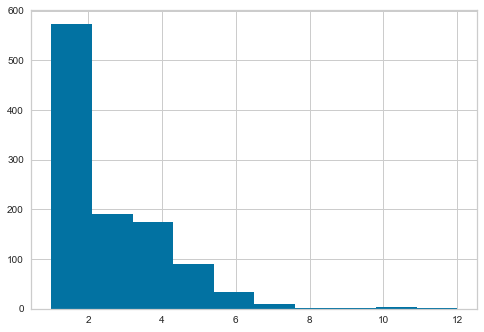

In [23]:
# pre-process: ROOMS -> clean dataset
def pre_process_rooms(input_value):
    result = []
    for x in input_value:
        tokens = str(x).split(" ")
        if pd.isna(tokens[0]):
            result.append(1)
        else:
            result.append(int(tokens[0]))
    return result

data_frame["ROOMS"] = pre_process_rooms(data_frame["ROOMS"].apply(lambda x: 1 if pd.isna(x) else x))
plt.hist(data_frame["ROOMS"])

In [24]:
# pre-processing: ADDRESS -> extract in seprate features and transform into numeric form
def pre_processing_address(input_value):
    if "," not in input_value:
        return input_value
        
    tokens = input_value.split(",")
    return tokens

def pre_processing_address_column(input_value, index):
    result = []
    for x in input_value.values:
        cell = pre_processing_address(x)
        result.append(cell[index])
    return result

In [25]:
data_frame["ADDRESS_PRIMARY"] = pre_processing_address_column(data_frame["ADDRESS"], 0)
data_frame["ADDRESS_SECONDARY"] = pre_processing_address_column(data_frame["ADDRESS"], 1)

In [26]:
# data_frame["ADDRESS_PRIMARY"] = data_frame["ADDRESS_PRIMARY"].apply(lambda x: hash(x))
# data_frame["ADDRESS_SECONDARY"] = data_frame["ADDRESS_SECONDARY"].apply(lambda x: hash(x))

jobs_encoder = LabelBinarizer()
jobs_encoder.fit(data_frame['ADDRESS_PRIMARY'].values)
# data_frame["ADDRESS_PRIMARY"] = jobs_encoder.transform(data_frame['ADDRESS_PRIMARY'])

one_hot_primary_address = jobs_encoder.transform(data_frame['ADDRESS_PRIMARY'].to_numpy().reshape(-1, 1))
primary_address_df = pd.DataFrame(one_hot_primary_address, columns=jobs_encoder.classes_)
# len(jobs_encoder.classes_)
primary_address_df

,Аннинский р-н,Бобровский р-н,Богучарский р-н,Борисоглебский р-н,Бутурлиновский р-н,В,Верхнемамонский р-н,Верхнехавский р-н,Воронеж,Воронеж (Железнодорожный р-н,...,Петропавловский р-н,Поворинский р-н,Подгоренский р-н,Рамонский р-н,Репьевский р-н,Россошанский р-н,Семилукский р-н,Таловский р-н,Хохольский р-н,Эртильский р-н
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1077,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1078,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [27]:
jobs_encoder.fit(data_frame['ADDRESS_SECONDARY'].values)
one_hot_secondary_address = jobs_encoder.transform(data_frame['ADDRESS_SECONDARY'].to_numpy().reshape(-1,1))
secondary_address_df = pd.DataFrame(one_hot_secondary_address, columns=jobs_encoder.classes_)
secondary_address_df

,-,1 Мая ул (Коминтерновский р-н,17 Сентября ул,20-летия ВЛКСМ ул,206 стрелковой дивизии ул,206 стрелковой дивизии ул (Левобережный р-н,25 Октября ул,30-летия Октября проезд (Ленинский р-н,45 стрелковой дивизии ул (Коминтерновский р-н,5 Декабря ул (Ленинский р-н),...,Щучинские Пески с,Эртиль,Яблочное с,Яблочный проезд,Ямное с,им Дзержинского п,свх Воронежский п,свх Масловский 1 отделение п,свх Новоусманский 1 отделение п,о
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# address_encoded = pd.concat([primary_address_df, secondary_address_df], axis=1)

In [29]:
data_frame = pd.concat([data_frame, primary_address_df], axis=1)

In [30]:
data_frame = data_frame.drop(["URL_1", "ADDRESS", "DESCRIPTION", "DISTRICT", "ADDRESS_PRIMARY", "ADDRESS_SECONDARY"], axis=1)
data_frame.isna().sum()
data_frame = data_frame.dropna()

In [31]:
data_frame # [DONE] reconsider hashing approach to address field -> move to one-hot encoding

,PROPERTY_TYPE,PRICE,ROOMS,BACKYARD_SQUARE_METERS,SQUARE_METERS_1,SQUARE_METERS_2,SQUARE_METERS_3,STOREY,MATERIAL,Аннинский р-н,...,Петропавловский р-н,Поворинский р-н,Подгоренский р-н,Рамонский р-н,Репьевский р-н,Россошанский р-н,Семилукский р-н,Таловский р-н,Хохольский р-н,Эртильский р-н
0,0.0,3810000,4.0,7.45,106.0,45.0,45.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,4980000,4.0,10.00,97.3,59.0,59.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,9950000,4.0,5.50,146.2,98.0,98.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,8500000,1.0,2.00,249.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3700000,3.0,12.00,76.0,40.0,40.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,0.0,1200000,4.0,4.00,80.0,1.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1077,0.0,950000,2.0,1.00,30.0,1.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1078,0.0,5000000,1.0,1.00,160.0,96.0,96.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1079,0.0,6000000,1.0,19.00,269.0,150.0,150.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# pre-processing is over, checking dataset and build the model

In [33]:
# check for dirty data
# count = 0
# for index, row in sample.iterrows():
#     # for index, row in sample.iterrows():
#     if (isinstance(sample.at[index, "ROOMS"], type('str')) == True):
#         count += 1
#         sample.at[index, "ROOMS"] = 0
    
#     if (isinstance(sample.at[index, "BACKYARD_SQUARE_METERS"], type('str')) == True):
#         count += 1
#         sample.at[index, "BACKYARD_SQUARE_METERS"] = 0
    
#     if (isinstance(sample.at[index, "SQUARE_METERS_1"], type('str')) == True):
#         count += 1
#         sample.at[index, "SQUARE_METERS_1"] = 0
    
#     if (isinstance(sample.at[index, "SQUARE_METERS_2"], type('str')) == True):
#         count += 1
#         sample.at[index, "SQUARE_METERS_2"] = 0
        
#     if (isinstance(sample.at[index, "SQUARE_METERS_3"], type('str')) == True):
#         count += 1
#         sample.at[index, "SQUARE_METERS_3"] = 0
        
#     if (isinstance(sample.at[index, "STOREY"], type('str')) == True):
#         count += 1
#         sample.at[index, "STOREY"] = 0
    
#     if (isinstance(sample.at[index, "MATERIAL"], type('str')) == True):
#         count += 1
#         sample.at[index, "MATERIAL"] = 0

# print(count)

In [34]:
to_float = lambda x: float(x)
for x in data_frame.columns:
    data_frame[x] = data_frame[x].apply(to_float)

data_frame

,PROPERTY_TYPE,PRICE,ROOMS,BACKYARD_SQUARE_METERS,SQUARE_METERS_1,SQUARE_METERS_2,SQUARE_METERS_3,STOREY,MATERIAL,Аннинский р-н,...,Петропавловский р-н,Поворинский р-н,Подгоренский р-н,Рамонский р-н,Репьевский р-н,Россошанский р-н,Семилукский р-н,Таловский р-н,Хохольский р-н,Эртильский р-н
0,0.0,3810000.0,4.0,7.45,106.0,45.0,45.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,4980000.0,4.0,10.00,97.3,59.0,59.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,9950000.0,4.0,5.50,146.2,98.0,98.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,8500000.0,1.0,2.00,249.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3700000.0,3.0,12.00,76.0,40.0,40.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,0.0,1200000.0,4.0,4.00,80.0,1.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1077,0.0,950000.0,2.0,1.00,30.0,1.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1078,0.0,5000000.0,1.0,1.00,160.0,96.0,96.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1079,0.0,6000000.0,1.0,19.00,269.0,150.0,150.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\Gelassen\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\Users\Gelassen\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


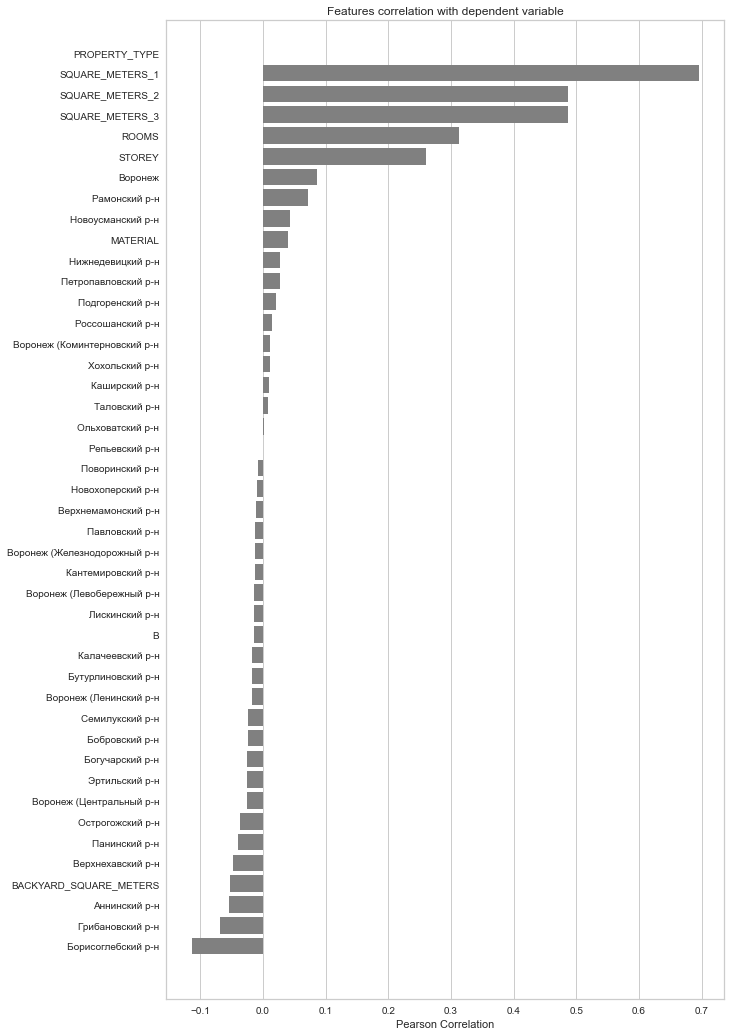

In [35]:
# lets check the correlation of the feature to target
X, y = data_frame.drop(columns =['PRICE']), data_frame['PRICE']

features = np.array(data_frame.drop(columns = ['PRICE']).columns)
fig, ax = plt.subplots(figsize=(10,18))
visualizer = feature_correlation(X, y, labels=features, sort= True, color='gray', show=True, ax=ax)
plt.show()

In [36]:
%%time
# look for correlated data, avoid multi correlated data (features that depends on each other) within regression feature

# corr = data_frame[data_frame.columns[:48]].corr()
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True

# sns.set(rc={'figure.figsize': (25, 25)})
# sns.heatmap(corr, mask=mask, square=True, cmap='YlGnBu', annot=True)

# there is correlated values, but unlikely they imply causation 

Wall time: 0 ns


In [37]:
# df = data_frame[["PROPERTY_TYPE", "PRICE", "ROOMS", "BACKYARD_SQUARE_METERS", "SQUARE_METERS_1", "SQUARE_METERS_2", "SQUARE_METERS_3", "STOREY", "MATERIAL"]]
df = data_frame[["PRICE", "ROOMS", "SQUARE_METERS_1", "SQUARE_METERS_2", "SQUARE_METERS_3", "STOREY"]]
df

,PRICE,ROOMS,SQUARE_METERS_1,SQUARE_METERS_2,SQUARE_METERS_3,STOREY
0,3810000.0,4.0,106.0,45.0,45.0,2.0
1,4980000.0,4.0,97.3,59.0,59.0,1.0
2,9950000.0,4.0,146.2,98.0,98.0,2.0
3,8500000.0,1.0,249.0,1.0,1.0,1.0
4,3700000.0,3.0,76.0,40.0,40.0,1.0
...,...,...,...,...,...,...
1076,1200000.0,4.0,80.0,1.0,1.0,1.0
1077,950000.0,2.0,30.0,1.0,1.0,1.0
1078,5000000.0,1.0,160.0,96.0,96.0,1.0
1079,6000000.0,1.0,269.0,150.0,150.0,1.0


In [38]:
#  transform dataset to normally distributed form

# df["PRICE"] = df["PRICE"].apply(np.log)
# df["LOG_ROOMS"] = df["ROOMS"].apply(np.log)
# df["LOG_BACKYARD_SQUARE_METERS"] = df["BACKYARD_SQUARE_METERS"].apply(np.log)
df["LOG_SQUARE_METERS_1"] = df["SQUARE_METERS_1"].apply(np.log)
df["LOG_SQUARE_METERS_2"] = df["SQUARE_METERS_2"].apply(np.log)
df["LOG_SQUARE_METERS_3"] = df["SQUARE_METERS_3"].apply(np.log)
# df["LOG_STOREY"] = df["STOREY"].apply(np.log)
# df["LOG_MATERIAL"] = df["MATERIAL"].apply(np.log)

<ipython-input-38-36b1513860c4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["LOG_SQUARE_METERS_1"] = df["SQUARE_METERS_1"].apply(np.log)
<ipython-input-38-36b1513860c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["LOG_SQUARE_METERS_2"] = df["SQUARE_METERS_2"].apply(np.log)
<ipython-input-38-36b1513860c4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [39]:
df = df.drop(["SQUARE_METERS_1", "SQUARE_METERS_2", "SQUARE_METERS_3"], axis=1)
# X = df.drop("PRICE").to_numpy()

X = df.drop(["PRICE"], axis=1).to_numpy()
X

array([[4.        , 2.        , 4.66343909, 3.80666249, 3.80666249],
       [4.        , 1.        , 4.57779899, 4.07753744, 4.07753744],
       [4.        , 2.        , 4.98497555, 4.58496748, 4.58496748],
       ...,
       [1.        , 1.        , 5.07517382, 4.56434819, 4.56434819],
       [1.        , 1.        , 5.59471138, 5.01063529, 5.01063529],
       [5.        , 1.        , 5.82894562, 5.13579844, 5.13579844]])

In [40]:
y = df["PRICE"].to_numpy()
y
# X = df[["PROPERTY_TYPE", "ROOMS", "BACKYARD_SQUARE_METERS", "LOG_SQUARE_METERS_1", "LOG_SQUARE_METERS_2", "LOG_SQUARE_METERS_3", "LOG_STOREY", "MATERIAL"]]
# X

array([3810000., 4980000., 9950000., ..., 5000000., 6000000., 6200000.])

In [41]:
# X = (X - X.mean()) / X.std()
# X = np.c_[np.ones(X.shape[0]), X] 
# turn-off standartization to avoid NaNs 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [42]:
X

array([[4.        , 2.        , 4.66343909, 3.80666249, 3.80666249],
       [4.        , 1.        , 4.57779899, 4.07753744, 4.07753744],
       [4.        , 2.        , 4.98497555, 4.58496748, 4.58496748],
       ...,
       [1.        , 1.        , 5.07517382, 4.56434819, 4.56434819],
       [1.        , 1.        , 5.59471138, 5.01063529, 5.01063529],
       [5.        , 1.        , 5.82894562, 5.13579844, 5.13579844]])

In [43]:
scaler= RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [44]:
# test with sklearn regressor
regressor = LinearRegression()
test_model = regressor.fit(X_train, y_train)
y_predict = test_model.predict(X_train)

r2 = r2_score(y_train, y_predict)

print(f'R2 score={r2}, on validation dataset={regressor.score(X_test, y_test)}')

R2 score=0.2879285903119303, on validation dataset=0.3017515265818006


In [45]:
# verify r2 score on the model
def verify_score(model, X_test, y_test):
    
    model.eval()

    if torch.is_tensor(X_test) != True:
        X_test = torch.from_numpy(X_test).clone()
        y_test = torch.from_numpy(y_test).clone().reshape(-1,1)

    y_pred = model(X_test)
    # y_pred = y_pred.reshape(-1,-1)

    y_train_np = np.around(y_test, decimals=1).numpy()
    predicts_np = np.around(y_pred.clone().detach(), decimals=1).numpy()

    r2 = r2_score(y_train_np, predicts_np)

    print(f'r2 score = {r2}')
    
    return r2

In [46]:
# convert to the required shape 
X_train = torch.from_numpy(X_train).clone()
y_train = torch.from_numpy(y_train).clone().reshape(-1,1)

In [47]:
# architect the model
input_w_num = X_train.shape[1]
output_w_num = input_w_num * 3
model = torch.nn.Sequential(
    torch.nn.Linear(input_w_num, output_w_num, bias=True), torch.nn.ELU(),
    torch.nn.Linear(output_w_num, output_w_num, bias=True), torch.nn.ELU(),
    torch.nn.Dropout(p=0.2),
    torch.nn.Linear(output_w_num, input_w_num, bias = True), torch.nn.Sigmoid(),
    torch.nn.Linear(input_w_num, 1)
)

# model.load_state_dict(torch.load('model_state.txt'))
model.eval()

Sequential(
  (0): Linear(in_features=5, out_features=15, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=15, out_features=15, bias=True)
  (3): ELU(alpha=1.0)
  (4): Dropout(p=0.2, inplace=False)
  (5): Linear(in_features=15, out_features=5, bias=True)
  (6): Sigmoid()
  (7): Linear(in_features=5, out_features=1, bias=True)
)

In [48]:
model.double()
r2 = verify_score(model, X_test, y_test)
is_skip_training = r2 > 0.75

print("Skip training: " % is_skip_training)

intentionally stop chain execution

SyntaxError: invalid syntax (<ipython-input-48-2880256a2dc7>, line 7)

In [49]:
loss = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)
# optimizer = torch.optim.Adagrad(model.parameters(), lr=1e-1)

In [50]:
%%time
num_epoch = 16000
def train_model(model, loss, optimizer, x_train, y_train, num_epoch):
    train_accuracy_history = []
    train_avg_loss_history = []
    model.train()
    for n in range(num_epoch):
        correct_samples = 0
        total_samples = 0
        loss_accum = 0
        y_predicts = model(x_train)
        y_predicts = y_predicts.reshape(-1,1)
        loss_value = loss(y_train, y_predicts)
        loss_value.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        y_train_np = np.around(y_train, decimals=1).numpy()
        predicts_np = np.around(y_predicts.clone().detach(), decimals=1).numpy()
        
        correct_samples += np.sum(y_train_np == predicts_np)
        total_samples += y_train.shape[0]

        train_accuracy = float(correct_samples) / total_samples

        train_accuracy_history.append(train_accuracy)
        train_avg_loss_history.append(loss_value)
        
        r2 = r2_score(y_train_np, predicts_np)
        
        if n > 0 and (n % 100 == 0):
            print(f"Epoch={n}, train_avg_loss={loss_value}, train_accuracy={train_accuracy}. r2_score={r2}")

    return train_accuracy_history, train_avg_loss_history

Wall time: 0 ns


In [ ]:
%%time
# train the model
# num_epoch = 80000
model = model.double()
X_train = X_train.double()
y_train = y_train.double()
(train_accuracy_history, train_avg_loss_history) = train_model(model, loss, optimizer, X_train, y_train, num_epoch)

In [ ]:
plt.plot(np.array(train_avg_loss_history), '+')
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.show()